In [4]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
bright_features = pd.read_csv('massive_features.csv')
bright_features.drop(columns=['Unnamed: 0'],inplace=True)
bright_sample = pd.read_csv('../data/bright_sample/massive.csv.gz')

In [8]:
timeout_names = np.setdiff1d(bright_sample['original_ext_source_id'].values,bright_features['Name'].values)
len(timeout_names)

6

In [15]:
bright = pd.merge(bright_sample,bright_features,left_on='original_ext_source_id',right_on='Name')
len(bright)

2494

In [41]:
'(BP_RP)_0' in bright.columns

True

In [42]:
def plot_3_plots(df, col=None, cfunc=None, clim=None, points='scatter', *args, **kwargs):
    """
    Plot 2 CMDs side-by-side: first Gaia then WISE. Then plot the color-color plot
    
    Parameters
    ----------
    df : `~pandas.DataFrame`
        Contains all the columns you need to generate CMDs
    col : str
        Column to color points by, default behavior is to just plot density if points='hexbin'
    cfunc : function
        If not None, will apply the given function to the color array. E.g., abs, np.reciprocal, etc.
    clim : array-like
        Array-like of length 2. If given, sets the colorbar limits
    points : str
        If points='scatter', calls plt.scatter. If points='hexbin', calls plt.hexbin
    *args, **kwargs
        Passed to the plotting function
        
    Returns
    _______
    fig, optax, irax, colax
        Pyplot figure and axes objects
    """
    
    assert points in ['scatter','hexbin'], 'Please use points="scatter" or "hexbin"'
    
    fig, axes = plt.subplots(1,3,figsize=(15,5))
    
    optax = axes[0]
    irax = axes[1]
    colax = axes[2]
    
    opt_color = df['(BP_RP)_0']
    opt_mag = df['M_G']
    
    optax.set(xlabel=r'$G_{BP}-G_{RP}$',ylabel='$M_G$')
    
    ir_color = df['W1-W2']
    ir_mag = df['w1mpro'] + 5 * np.log10(df['parallax']) - 10
    
    irax.set(xlabel=r'$W1-W2$',ylabel=r'$M_{W1}$')
    
    colax.set(xlabel=r'$G_{BP}-G_{RP}$', ylabel=r'$W1-W2$')
    
    if col is not None:
        if cfunc is not None:
            color = cfunc(df[col])
            clab = '{0} ${1}$'.format(cfunc.__name__,col)
        else:
            color = df[col]
            clab = '${0}$'.format(col)
    
    if points=='scatter':
        if col is not None:
            opt_obj = optax.scatter(opt_color,opt_mag,c=color,*args,**kwargs)
            ir_obj = irax.scatter(ir_color,ir_mag,c=color,*args,**kwargs)
            col_obj = colax.scatter(opt_color, ir_color, c=color, *args, **kwargs)
        else:
            optax.scatter(opt_color,opt_mag,*args,**kwargs)
            irax.scatter(ir_color,ir_mag,*args,**kwargs)
            col_obj = colax.scatter(opt_color, ir_color, *args, **kwargs)
            
    elif points=='hexbin':
        if col is not None:
            opt_obj = optax.hexbin(opt_color,opt_mag,C=color,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,C=color,*args,**kwargs)
            col_obj = colax.hexbin(opt_color,ir_color,C=color,*args,**kwargs)
        else:
            opt_obj = optax.hexbin(opt_color,opt_mag,*args,**kwargs)
            ir_obj = irax.hexbin(ir_color,ir_mag,*args,**kwargs)
            col_obj = colax.hexbin(opt_color,ir_color,*args,**kwargs)
    
    for ax in axes[:2]:
        ax.invert_yaxis()
    
    if col is not None:
    
        cbar = plt.colorbar(col_obj,ax=[optax,irax,colax],label=clab)
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
            col_obj.set_clim(*clim)
        
    elif points=='hexbin':
        
        cbar = plt.colorbar(col_obj,ax=[optax,irax,colax],label='N')
        if clim is not None:
            opt_obj.set_clim(*clim)
            ir_obj.set_clim(*clim)
            col_obj.set_clim(*clim)
            
    return fig,optax,irax,colax,cbar

[(-2, -7.25), (-0.3, 1)]

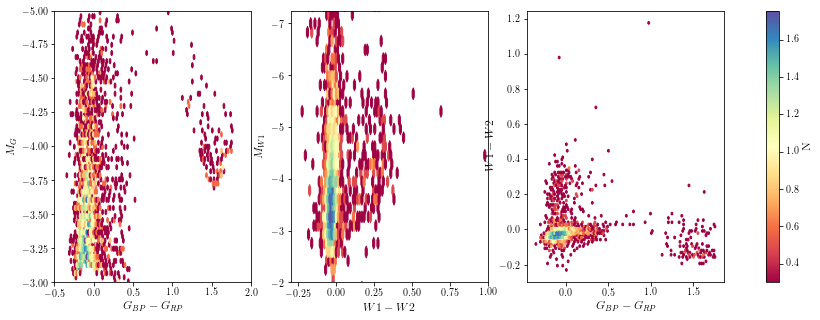

In [43]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, points='hexbin', mincnt=1, bins='log', cmap='Spectral')
optax.set(xlim=(-0.5,2), ylim=(-3,-5))
irax.set(xlim=(-0.3,1),ylim=(-2,-7.25))

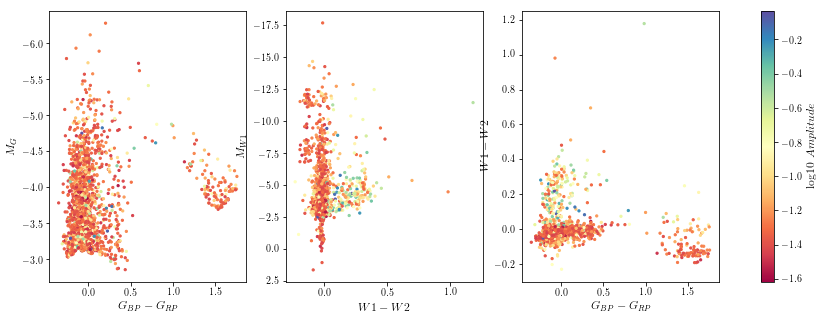

In [44]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Amplitude', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

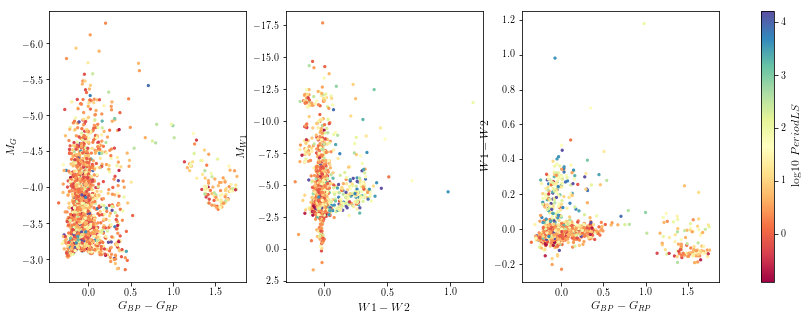

In [46]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='PeriodLS', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

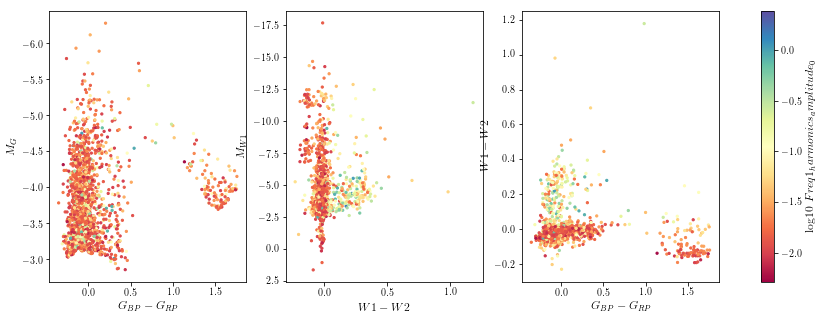

In [47]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Freq1_harmonics_amplitude_0', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

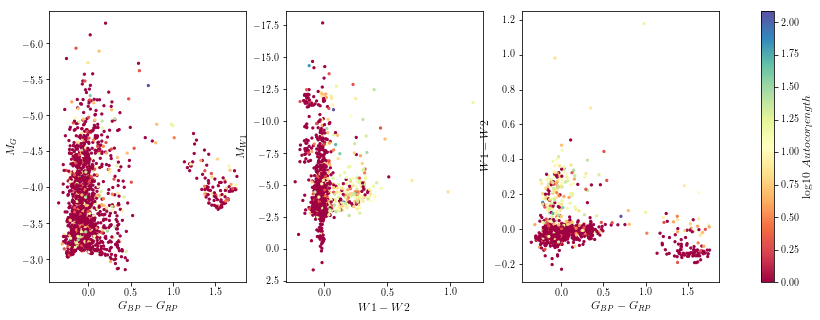

In [48]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Autocor_length', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

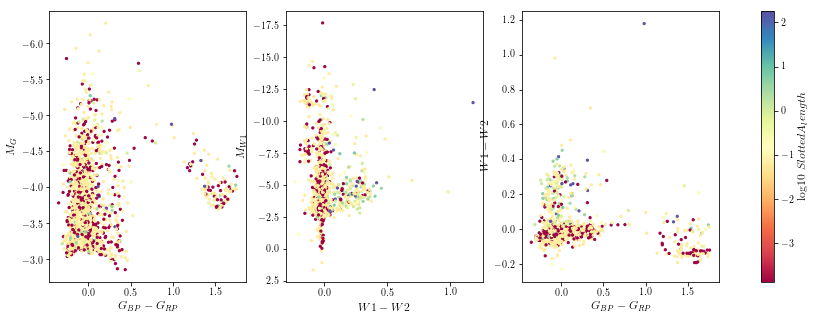

In [49]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='SlottedA_length', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

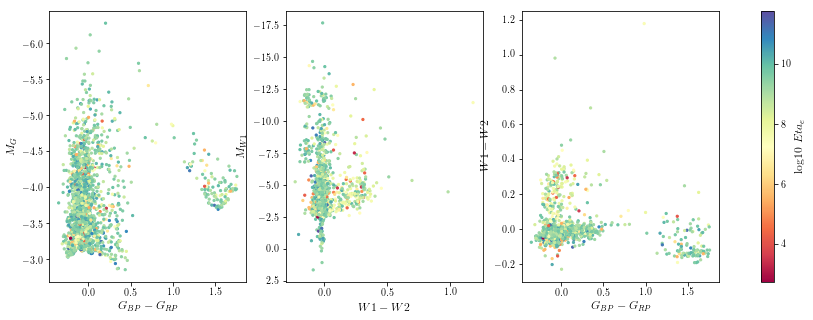

In [50]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Eta_e', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

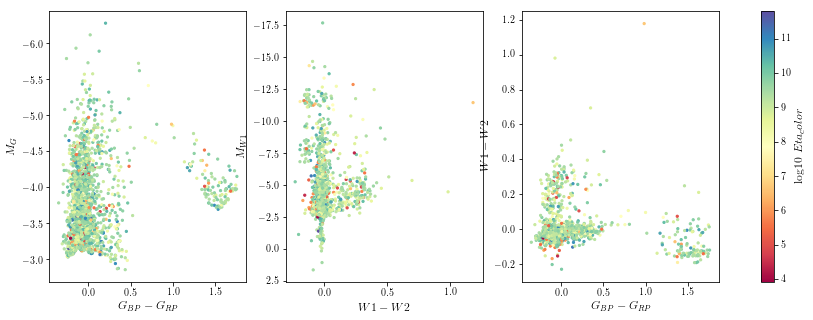

In [51]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Eta_color', cfunc=np.log10, points='scatter', s=5, cmap='Spectral')

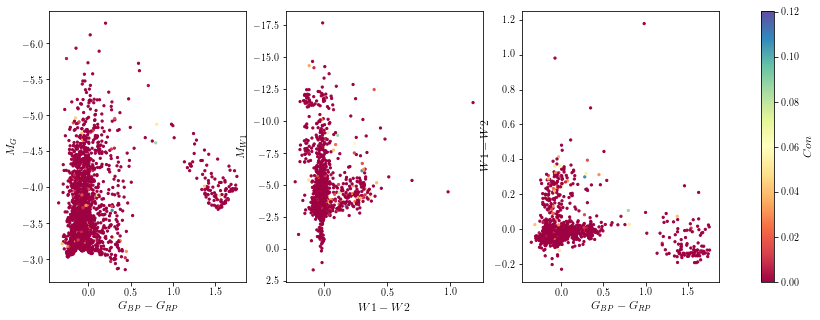

In [52]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='Con', points='scatter', s=5, cmap='Spectral')

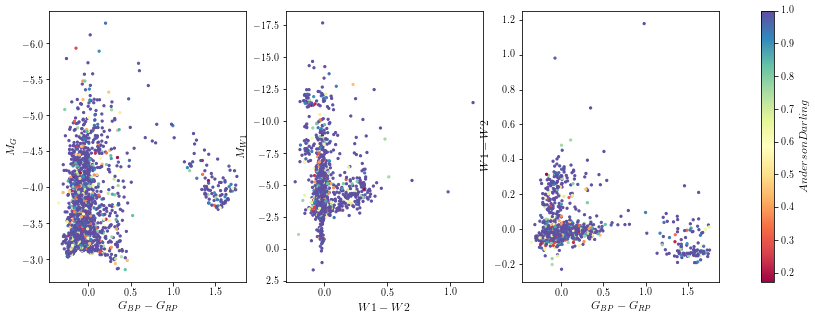

In [53]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='AndersonDarling', points='scatter', s=5, cmap='Spectral')

In [54]:
def log_inv(x):
    __name__ = 'Log Inverse'
    return np.log10(np.reciprocal(x))

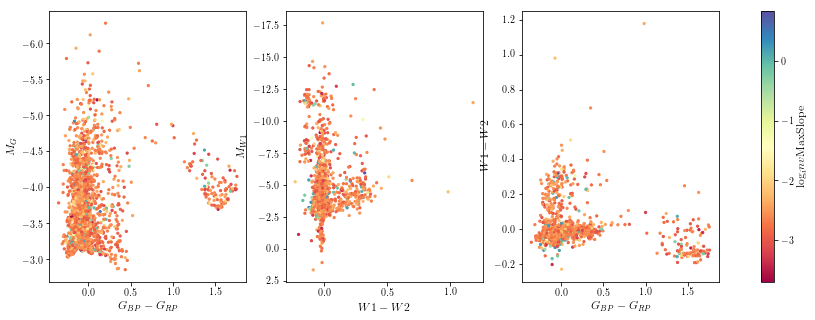

In [55]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='MaxSlope', cfunc=log_inv, points='scatter', s=5, cmap='Spectral')

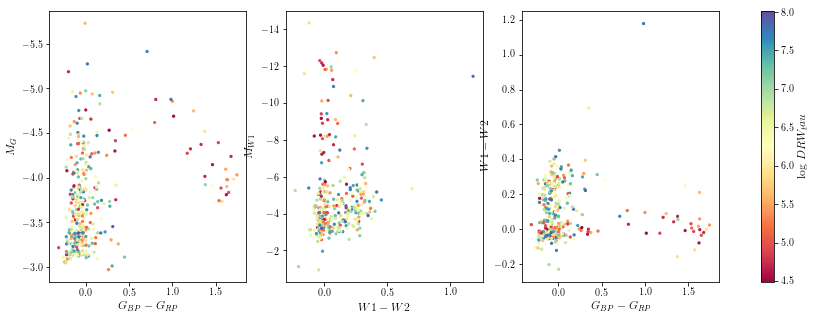

In [57]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='DRW_tau', cfunc=np.log, points='scatter', s=5, cmap='Spectral')

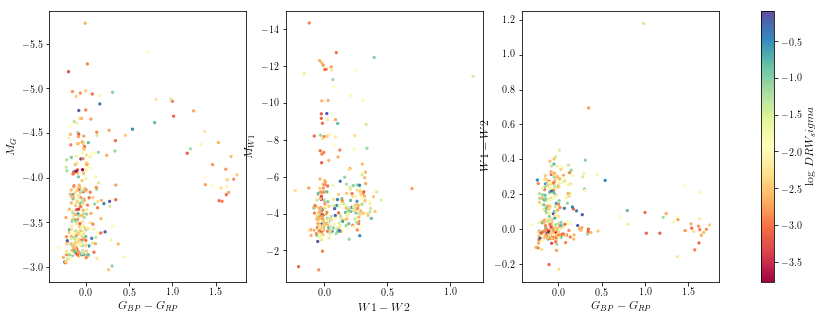

In [59]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='DRW_sigma', cfunc=np.log, points='scatter', s=5, cmap='Spectral')

In [66]:
def sign_log_abs(x):
    __name__ = 'Sign Log Abs'
    return np.sign(x)*np.log(np.abs(x))

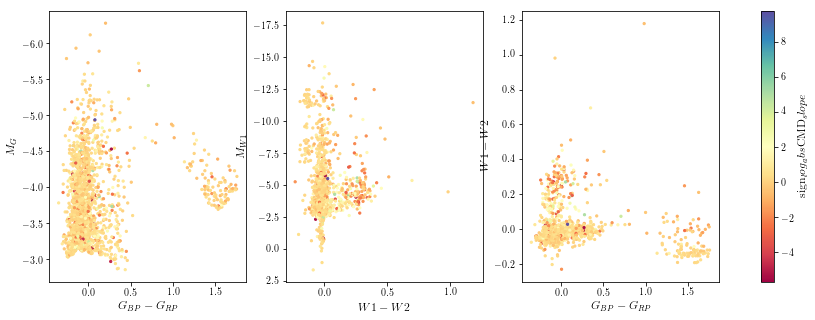

In [68]:
fig, optax, irax, colax, cbar = plot_3_plots(bright, col='CMD_slope', cfunc=sign_log_abs, points='scatter', s=5, cmap='Spectral')